In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.tree import export_text
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Pré-Processamento de Dados

### Exploração de Dados

In [2]:
heartAtk = pd.read_csv("./heart_attack_prediction_dataset.csv")
heartAtk.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [3]:
heartAtk.shape

(8763, 26)

In [4]:
heartAtk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
heartAtk.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### Preparação dos Dados

Procedemos à remoção de colunas que introduziam redundância e irrelevância ao nosso modelo.

In [6]:
columns_to_drop=['Patient ID','Hemisphere']
heartAtk_clean_version1 = heartAtk.drop(columns_to_drop,axis=1)

In [7]:
heartAtk_clean_version1.shape

(8763, 24)

In [8]:
heartAtk_clean_version1.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


Como a maior parte dos valores presentes nos atributos são de natureza binária, então pode-se retirar muitas informações desta tabela.
Por exemplo, a média da coluna '*Diabetes*' é __0,65__ o que nos informa que mais de metade dos pacientes neste *dataset* tem diabetes. Similarmente, conseguimos perceber que a maioria dos pacientes é fumador pelo valor médio (__0.89__) da coluna '*Smoking*'. Assim, conseguimos perceber que os valores que tratamos são relativos a pacientes que já têm propensidade a ter complicações médicas - o que poderá indicar a ocorrência de um ataque cardíaco posteriormente.

Testamos a presença de valores nulos no nosso dataset.

Nenhum valor nulo detetado.


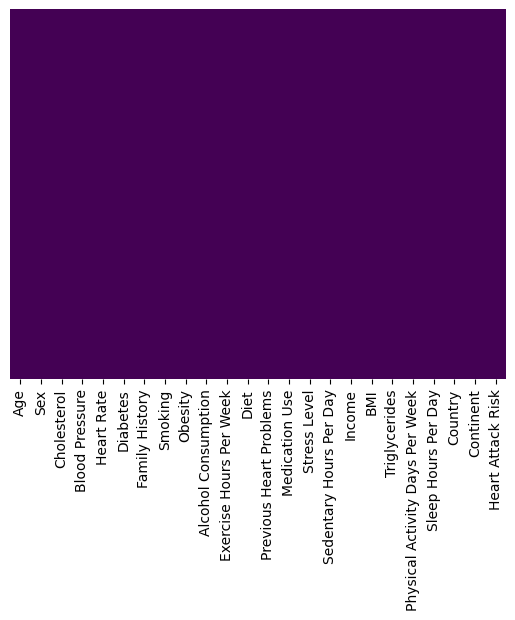

In [9]:
heartAtk_clean_version1.isna().any()
sns.heatmap(heartAtk_clean_version1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print("Nenhum valor nulo detetado.")

Testamos a presença de valores duplicados, eliminando-os.

In [10]:
heartAtk_clean_version1.duplicated().sum()
heartAtk_clean_version1.drop_duplicates(inplace=True)
heartAtk_clean_version1.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,Canada,North America,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,France,Europe,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,9,7.648981,125640,36.464704,378,3,4,Canada,North America,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,0


***Categorização da coluna *_Blood Pressure_* por categoria***
A coluna *_Blood Pressure_* é uma variável importante que tem que ser classificada com alguns detalhes em mente.

Neste momento, os valores desta coluna estão a seguir o seguinte formato: Pressão Sistólica/Diastólica.
Assim sendo, este formato não nos é muito útil. Deste modo, recorremos a classificações categóricas, recorrendo a informações provinientes das seguintes instituições : *WHO* (*_World Health Organization_*), *_Harvard Health_* e *_American Heart Association_*.

**Normal** : menos de 120 Pressão Sistólica(mm Hg) e menos de 80 Pressão Diastólica(mm Hg).

**Elevated** : Pressão Sistólica entre 120-129 e menos de 80 Pressão Diastólica.

**High Blood Pressure (Hypertension) Stage 1** : Pressão Sistólica entre 130-139 ou Pressão Diastólica entre 80-89.

**High Blood Pressure (Hypertension) Stage 2** : 140 ou mais de Pressão Sistólica ou Pressão Diastólica a 90 ou mais.

**Hypertensive Crisis :** Pressão Sistólica a 180 ou mais e/ou Pressão Diastólica a 120 ou mais.



In [11]:
# Separamos os valores da coluna Blood Pressure em duas colunas diferentes para se poder analisar a pressão Sistólica e Diastólica mais facilmente

def string_int_systolic(string):
    parts = string.split('/')
    return int(parts[0])

def string_int_diastolic(string):
    parts = string.split('/')
    return int(parts[1])


heartAtk_clean_version2 = pd.DataFrame(heartAtk_clean_version1)
heartAtk_clean_version2['Systolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_systolic)
heartAtk_clean_version2['Diastolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_diastolic)


No entanto, estes valores têm também de ser adaptados a grupos de idades relevantes, para um tratamento de dados mais eficiente.
Grupos de idades estabelecidos : **18-39** ; **40-59**; **60+** .


In [12]:
labels = ['18-39', '40-59', '60+']
bins = [18, 39, 59, 110]

# Creating an 'Age Group' column
heartAtk_clean_version2['Age Group'] = pd.cut(heartAtk_clean_version2['Age'], bins=bins, labels=labels, right=False)

# Grouping by 'Age Group' and 'Sex'
grouped = heartAtk_clean_version2.groupby(['Age Group', 'Sex'],observed=False)

age_group_1839_men = grouped.get_group(('18-39', 'Male'))
age_group_1839_women = grouped.get_group(('18-39', 'Female'))

age_group_4059_men = grouped.get_group(('40-59', 'Male'))
age_group_4059_women = grouped.get_group(('40-59', 'Female'))

age_group_60over_men = grouped.get_group(('60+', 'Male'))
age_group_60over_women = grouped.get_group(('60+', 'Female'))

age_group_1839_men.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
1,21,Male,389,165/93,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,0,165,93,18-39
8,20,Male,145,144/105,68,1,0,1,1,0,...,35.809901,790,7,4,Brazil,South America,0,144,105,18-39
17,38,Male,166,120/74,56,1,0,1,1,0,...,29.517388,402,0,6,Thailand,Asia,0,120,74,18-39
24,36,Male,133,161/90,97,1,0,1,1,1,...,22.386804,605,5,10,Canada,North America,0,161,90,18-39
31,25,Male,197,178/72,45,0,1,1,0,1,...,18.522199,661,0,6,Spain,Europe,0,178,72,18-39


In [13]:
mean_age39_systolic_men = age_group_1839_men['Systolic Pressure'].mean()
mean_age39_diastolic_men = age_group_1839_men['Diastolic Pressure'].mean()

mean_age39_systolic_women = age_group_1839_women['Systolic Pressure'].mean()
mean_age39_diastolic_women = age_group_1839_women['Diastolic Pressure'].mean()

mean_age59_systolic_men = age_group_4059_men['Systolic Pressure'].mean()
mean_age59_diastolic_men = age_group_4059_men['Diastolic Pressure'].mean()

mean_age59_systolic_women = age_group_4059_women['Systolic Pressure'].mean()
mean_age59_diastolic_women = age_group_4059_women['Diastolic Pressure'].mean()

mean_age60over_systolic_men = age_group_60over_men['Systolic Pressure'].mean()
mean_age60over_diastolic_men = age_group_60over_men['Diastolic Pressure'].mean()

mean_age60over_systolic_women = age_group_60over_women['Systolic Pressure'].mean()
mean_age60over_diastolic_women = age_group_60over_women['Diastolic Pressure'].mean()


print("Blood pressure means on men (age group 18-39) :\n Systolic %f ; Diastolic %f" %(mean_age39_systolic_men, mean_age39_diastolic_men) )
print("Blood pressure means on women (age group 18-39) :\n Systolic %f ; Diastolic %f\n" %(mean_age39_systolic_women, mean_age39_diastolic_women) )

print("Blood pressure means on men (age group 40-59) :\n Systolic %f ; Diastolic %f" %(mean_age59_systolic_men, mean_age59_diastolic_men) )
print("Blood pressure means on women (age group 40-59) :\n Systolic %f ; Diastolic %f\n" %(mean_age59_systolic_women, mean_age59_diastolic_women) )

print("Blood pressure means on men (age group 60+) :\n Systolic %f ; Diastolic %f" %(mean_age60over_systolic_men, mean_age60over_diastolic_men) )
print("Blood pressure means on women (age group 60+) :\n Systolic %f ; Diastolic %f\n" %(mean_age60over_systolic_women, mean_age60over_diastolic_women) )

Blood pressure means on men (age group 18-39) :
 Systolic 134.558413 ; Diastolic 84.931247
Blood pressure means on women (age group 18-39) :
 Systolic 135.510740 ; Diastolic 85.658711

Blood pressure means on men (age group 40-59) :
 Systolic 134.773538 ; Diastolic 85.468308
Blood pressure means on women (age group 40-59) :
 Systolic 135.515328 ; Diastolic 85.979562

Blood pressure means on men (age group 60+) :
 Systolic 135.363367 ; Diastolic 85.067853
Blood pressure means on women (age group 60+) :
 Systolic 135.053144 ; Diastolic 84.401240



Neste momento, as colunas *_Age_* e *_Blood Pressure_* são redundantes e portanto iremos eliminá-las.

In [14]:
heartAtk_clean_finalVersion = heartAtk_clean_version2.drop(['Blood Pressure'],axis=1)
heartAtk_clean_finalVersion

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,0,158,88,60+
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,0,165,93,18-39
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,0,174,99,18-39
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,0,163,100,60+
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,0,91,88,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,0,94,76,60+
8759,28,Female,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,0,157,102,18-39
8760,47,Male,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,1,161,75,40-59
8761,36,Male,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,0,119,67,18-39


In [15]:
heartAtk_clean_finalVersion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Age                              8763 non-null   int64   
 1   Sex                              8763 non-null   object  
 2   Cholesterol                      8763 non-null   int64   
 3   Heart Rate                       8763 non-null   int64   
 4   Diabetes                         8763 non-null   int64   
 5   Family History                   8763 non-null   int64   
 6   Smoking                          8763 non-null   int64   
 7   Obesity                          8763 non-null   int64   
 8   Alcohol Consumption              8763 non-null   int64   
 9   Exercise Hours Per Week          8763 non-null   float64 
 10  Diet                             8763 non-null   object  
 11  Previous Heart Problems          8763 non-null   int64   
 12  Medica

Agora procederemos a categorizar certas colunas assim como codificar algumas que precisarão desse tratamento.

**Categorizar Blood Pressure** 

**Hot Encoding Sex, Diet e Age Groups**

In [16]:
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Sex'], prefix='Sex')
heartAtk_clean_finalVersion['Sex_Female']= heartAtk_clean_finalVersion['Sex_Female'].astype(int)
heartAtk_clean_finalVersion['Sex_Male']= heartAtk_clean_finalVersion['Sex_Male'].astype(int)

heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Diet'], prefix='Diet')
heartAtk_clean_finalVersion['Diet_Unhealthy']= heartAtk_clean_finalVersion['Diet_Unhealthy'].astype(int)
heartAtk_clean_finalVersion['Diet_Average']= heartAtk_clean_finalVersion['Diet_Average'].astype(int)
heartAtk_clean_finalVersion['Diet_Healthy']= heartAtk_clean_finalVersion['Diet_Healthy'].astype(int)

heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Age Group'], prefix='AgeGroup')
heartAtk_clean_finalVersion['AgeGroup_18-39'] = heartAtk_clean_finalVersion['AgeGroup_18-39'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_40-59'] = heartAtk_clean_finalVersion['AgeGroup_40-59'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_60+'] = heartAtk_clean_finalVersion['AgeGroup_60+'].astype(int)

heartAtk_clean_finalVersion = pd.get_dummies(heartAtk_clean_finalVersion, columns=['Country', 'Continent']) 
country_columns = [col for col in heartAtk_clean_finalVersion.columns if col.startswith('Country_')]
continent_columns = [col for col in heartAtk_clean_finalVersion.columns if col.startswith('Continent')]

le = LabelEncoder()
for col in country_columns:
    heartAtk_clean_finalVersion[col] = le.fit_transform(heartAtk_clean_finalVersion[col])

for col in continent_columns:
    heartAtk_clean_finalVersion[col] = le.fit_transform(heartAtk_clean_finalVersion[col])

In [17]:
heartAtk_clean_finalVersion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Cholesterol                      8763 non-null   int64  
 2   Heart Rate                       8763 non-null   int64  
 3   Diabetes                         8763 non-null   int64  
 4   Family History                   8763 non-null   int64  
 5   Smoking                          8763 non-null   int64  
 6   Obesity                          8763 non-null   int64  
 7   Alcohol Consumption              8763 non-null   int64  
 8   Exercise Hours Per Week          8763 non-null   float64
 9   Previous Heart Problems          8763 non-null   int64  
 10  Medication Use                   8763 non-null   int64  
 11  Stress Level                     8763 non-null   int64  
 12  Sedentary Hours Per 

In [18]:
heartAtk_clean_finalVersion

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,67,208,72,0,0,1,0,0,4.168189,0,...,0,0,0,0,0,0,0,0,0,1
1,21,389,98,1,1,1,1,1,1.813242,1,...,0,0,0,0,0,0,0,0,1,0
2,21,324,72,1,0,0,0,0,2.078353,1,...,0,0,0,0,0,0,0,1,0,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,0,0,0,0,0,0,0,0,1,0
4,66,318,93,1,1,1,1,0,5.804299,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,...,1,0,0,0,0,1,0,0,0,0
8759,28,120,73,1,0,0,1,0,16.558426,0,...,0,0,0,0,0,0,0,0,1,0
8760,47,250,105,0,1,1,1,1,3.148438,1,...,0,0,0,0,0,0,0,0,0,1
8761,36,178,60,1,0,1,0,0,3.789950,1,...,0,0,0,0,0,0,0,0,0,1


**Análise Multivariável**

<Axes: >

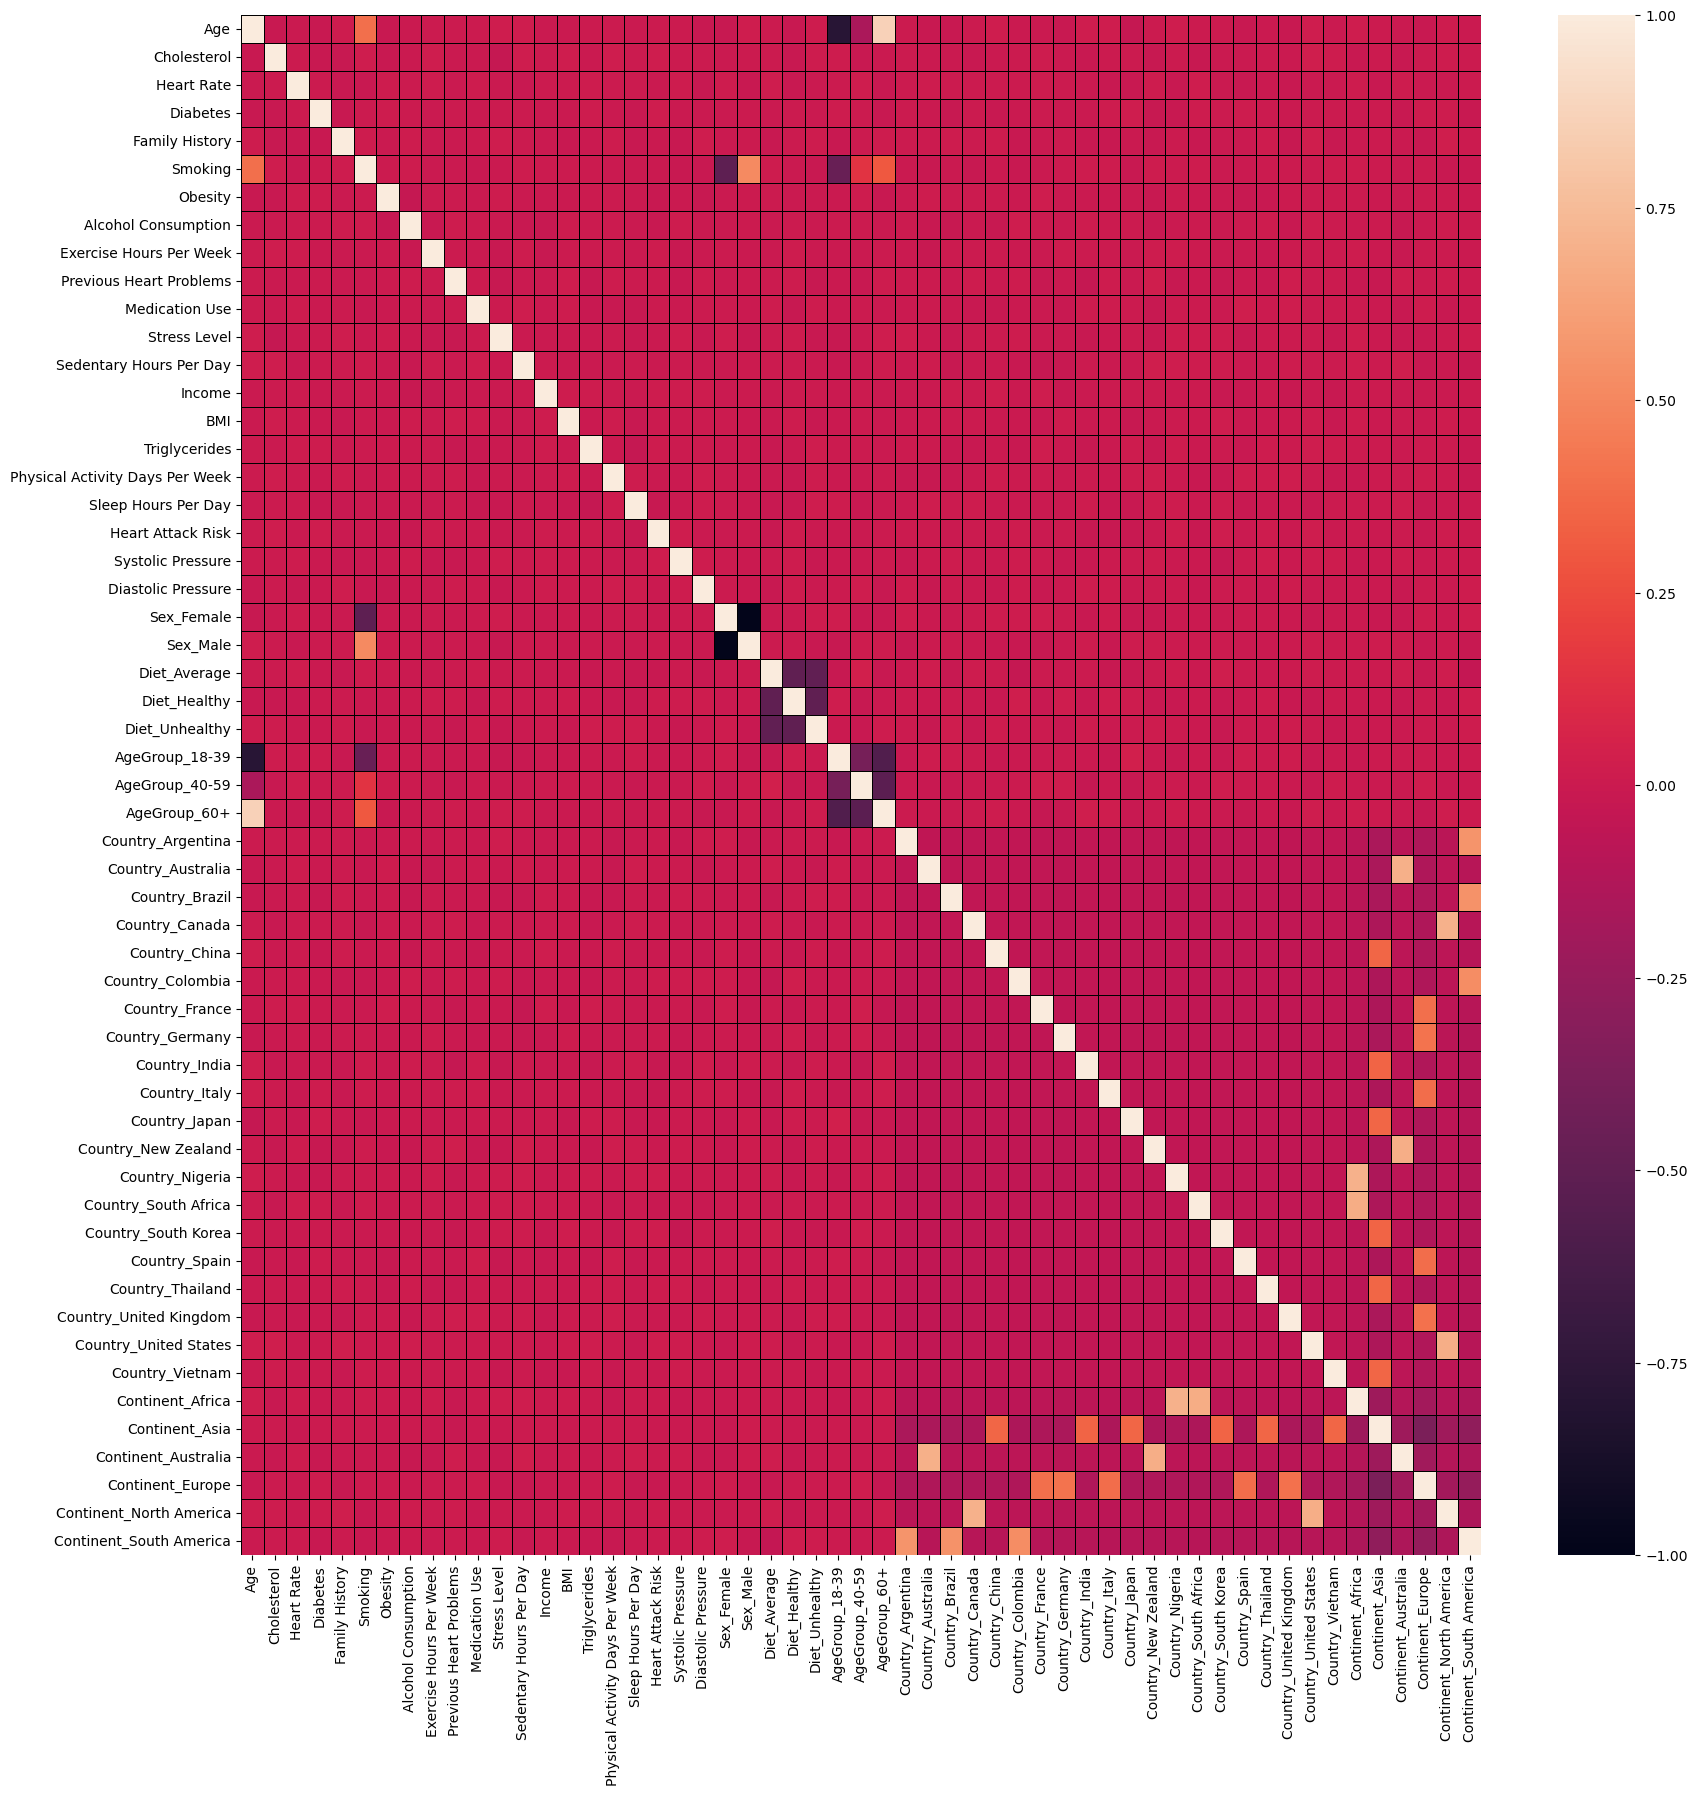

In [19]:

fig = plt.figure(figsize=(20,20))
correlation_matrix = heartAtk_clean_finalVersion.corr(method="pearson")
sns.heatmap(correlation_matrix, linecolor='black', linewidths=0.5)

**Pré Processamento de Dados: completo.**

---------

# Análise de Dados

O nosso objetivo com este dataset foi prever o risco de ataque cardíacos. Trata-se de um problema binário e portanto a primeira opção para obter o nosso modelo foi recorrer ao método de *_Decision Tree Classifier_*.



## Decision Tree Classifier Method

*_Decision Tree Classifier_* é um algoritmo de *_machine learning_* supervisionado que é usado para classificação e/ou regressão de *_datasets_*. Este método funciona dividindo os dados do *_dataset_* em subconjuntos menores com base em decisões sobre os valores das colunas. Essas decisões formam uma estrutura de árvore onde os ramos representam as condições de decisão e as folhas representam as classes ou valores previstos. Este método é popular pela simplicidade de interpretação que fornece assim como pela maneira que consegue processar relações entre *_features_* quer sejam estas lineares ou não. Adicionalmente, este método é bastante versátil e implementa uma leve importância nas *_features_*, podendo depois identificar-se mais facilmente aquelas que contribuiram mais ao processo de decisão que levaram ao modelo.

In [20]:
x = heartAtk_clean_finalVersion.drop(['Heart Attack Risk'], axis = 1)
y = heartAtk_clean_finalVersion['Heart Attack Risk']

# Creating testing data and training data.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=2022)
manual = {
    0: 1, 
    1: 3   
}

**Hold-Out Validation**

In [21]:
#Instance of the Decision Tree
dtc_model = DecisionTreeClassifier(random_state=2022,class_weight=manual)

#Begin training
dtc_model.fit(x_train, y_train)

# Predictions for the function
dtree_predictions = dtc_model.predict(x_test)

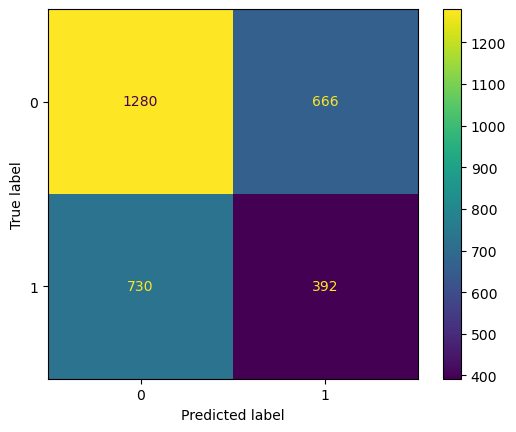

In [22]:
# And now for the Quality Metrics

# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, dtree_predictions)

In [23]:
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1946
           1       0.37      0.35      0.36      1122

    accuracy                           0.54      3068
   macro avg       0.50      0.50      0.50      3068
weighted avg       0.54      0.54      0.54      3068



Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 0 foi média (0.64), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 64%  das vezes.
- **Recall** (proporção de verdadeiros negativos entre todos os resultados verdadeiramente negativos) para a classe 0 foi relativamente baixo (0.66), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 66%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 1 foi relativamente baixa (0.37), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 37%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 1 foi alta (0.35), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 35%  das vezes.

In [24]:
accuracy = accuracy_score(y_test, dtree_predictions)
print("Accuracy Score: %s" %accuracy)
precision = precision_score(y_test, dtree_predictions)
print("Precision Score: %s" %precision)
recall = recall_score(y_test, dtree_predictions)
print("Recall Score: %s" %recall)

Accuracy Score: 0.5449804432855281
Precision Score: 0.3705103969754253
Recall Score: 0.3493761140819964


ROC and AUC Score: 0.5035678103811831


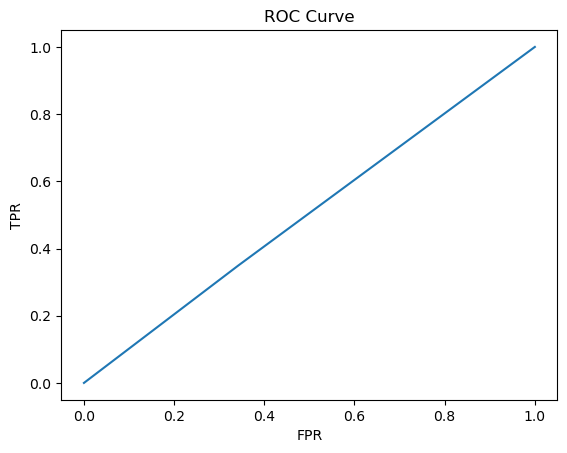

In [25]:
roc_auc = roc_auc_score(y_test,dtree_predictions)
print("ROC and AUC Score: %s" %roc_auc)

fpr, tpr, _ = roc_curve(y_test, dtree_predictions)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [26]:
f1 = f1_score(y_test, dtree_predictions)
fbeta = fbeta_score(y_test, dtree_predictions, beta=0.5)

print("F1 Score: %s" %f1)
print("FBeta Score: %s" %fbeta)

F1 Score: 0.3596330275229358
FBeta Score: 0.366081434441539


In [27]:
tree_structure = export_text(dtc_model, feature_names=list(x.columns))
print(tree_structure)


|--- Sleep Hours Per Day <= 9.50
|   |--- BMI <= 19.73
|   |   |--- Country_Germany <= 0.50
|   |   |   |--- Diastolic Pressure <= 97.50
|   |   |   |   |--- Income <= 63553.00
|   |   |   |   |   |--- Systolic Pressure <= 155.00
|   |   |   |   |   |   |--- Country_Thailand <= 0.50
|   |   |   |   |   |   |   |--- Sedentary Hours Per Day <= 2.18
|   |   |   |   |   |   |   |   |--- Triglycerides <= 335.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Triglycerides >  335.50
|   |   |   |   |   |   |   |   |   |--- Diet_Unhealthy <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Diet_Unhealthy >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Sedentary Hours Per Day >  2.18
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Country_Thailand >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Systolic Pr

**Cross Validation(k = 10)**

In [28]:
# And now for the Module Validation

dtccv_model = DecisionTreeClassifier(criterion = "entropy", max_depth=10, random_state=2022,class_weight=manual)
scores = cross_val_score(dtccv_model,x,y,cv = 10)
dtccv_model.fit(x_train,y_train)
dtccv_predictions = dtccv_model.predict(x_test)
print(scores)
print(classification_report(y_test,dtccv_predictions))
print("Accuracy of %0.2f with a standard deviation of %0.2f" %(scores.mean(), scores.std()))

[0.38426454 0.38996579 0.37970353 0.38584475 0.36757991 0.36872146
 0.3869863  0.36872146 0.37100457 0.37557078]
              precision    recall  f1-score   support

           0       0.64      0.16      0.26      1946
           1       0.37      0.84      0.51      1122

    accuracy                           0.41      3068
   macro avg       0.50      0.50      0.39      3068
weighted avg       0.54      0.41      0.35      3068

Accuracy of 0.38 with a standard deviation of 0.01


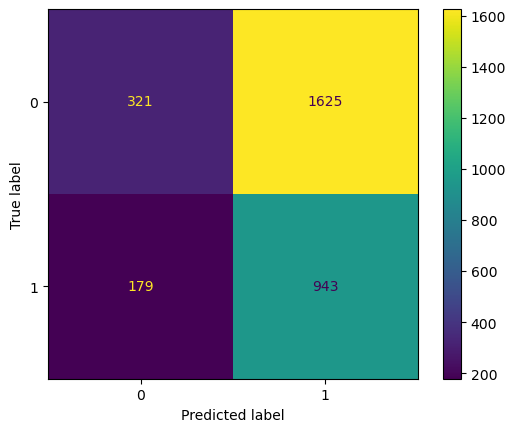

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, dtccv_predictions)

Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 0 foi média (0.64), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 64%  das vezes.
- **Recall** (proporção de verdadeiros negativos entre todos os resultados verdadeiramente negativos) para a classe 0 foi relativamente baixo (0.16), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 16%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 1 foi relativamente baixa (0.37), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 37%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 1 foi alta (0.84), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 84%  das vezes.

------------

## Support Vector Classifier (SVC)

Support Vector Classifier (SVC) é um algoritmo de *_machine learning_* algorithm com o objetivo de encontrar um hiperplano ótimo para separação de classes. Destaca-se em tarefas de classificação lineares e não lineares, identificando vetores de suporte críticos para determinar decisões. No entanto, o relatório de classificação apresentado indica desafios para o SVC, especialmente na obtenção de alta precisão e recall para ambas as classes, sugerindo áreas potenciais para otimização ou consideração de algoritmos alternativos.

c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

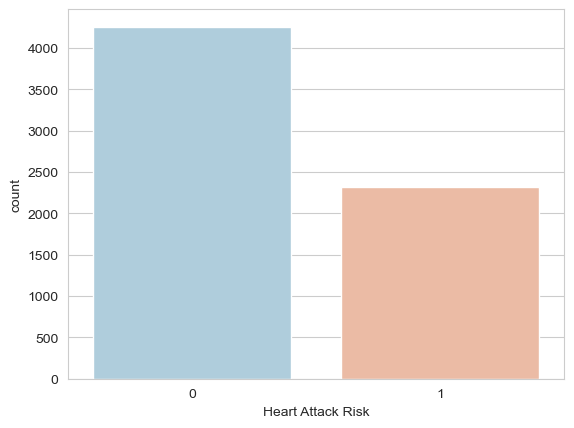

In [30]:
x = heartAtk_clean_finalVersion.drop(['Heart Attack Risk'], axis = 1)
y = heartAtk_clean_finalVersion['Heart Attack Risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=2022)

sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_train,columns=['Heart Attack Risk']), palette='RdBu_r')

c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

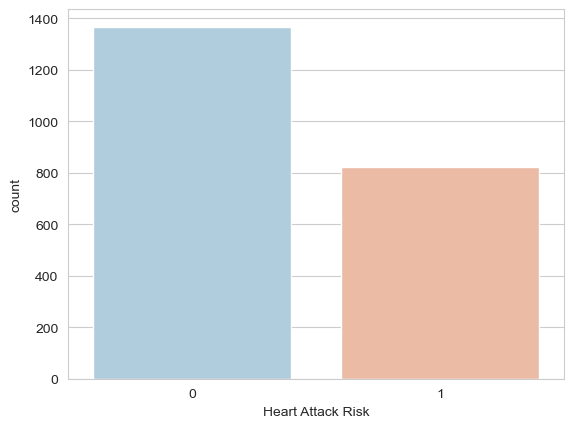

In [31]:
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_test,columns=['Heart Attack Risk']),palette='RdBu_r')

In [32]:
class_distribution = y.value_counts()
print(class_distribution)

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


**10-Fold Cross Validation**

In [33]:
cross_valid_modelo = SVC(random_state=2022)
scores = cross_val_score(cross_valid_modelo,x,y,cv=10)
scores

array([0.64196123, 0.64196123, 0.64196123, 0.64269406, 0.64155251,
       0.64155251, 0.64155251, 0.64155251, 0.64155251, 0.64155251])

In [34]:
print("%0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(),scores.std()))

0.64 accuracy with a standard deviation of 0.0004


In [35]:
svcmodel = SVC(random_state=2022, class_weight=manual)
svcmodel.fit(x_train,y_train)

SVC(class_weight={0: 1, 1: 3}, random_state=2022)

In [36]:
svc_predictions = svcmodel.predict(x_test)
print("%0.2f accuracy" % (accuracy_score(y_test,svc_predictions)))

0.38 accuracy


In [37]:
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1368
           1       0.38      1.00      0.55       823

    accuracy                           0.38      2191
   macro avg       0.19      0.50      0.27      2191
weighted avg       0.14      0.38      0.21      2191



c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


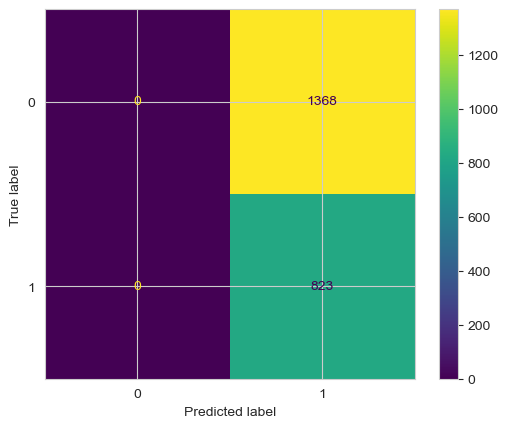

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test,svc_predictions)
plt.show()

Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 0 foi baixa (0.0), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 0%  das vezes.
- **Recall** (proporção de verdadeiros negativos entre todos os resultados verdadeiramente negativos) para a classe 0 foi baixa (0.0), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 0%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 1 foi relativamente baixa (0.38), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 38%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 1 foi média (1.00), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 100%  das vezes.

----------------------------------------------

## SCV com GridSearchCV

*_Grid Search CV_* é uma técnica de *_machine learning_* utilizada para fazer *_hyperparameter tuning_*. É uma técnica que sistematicamente procura pela melhor combinação para valores do modelo com o objetivo de melhorar a performance do modelo a ser treinado.

Utilizamos esta técnica por ajudar na otimização do modelo, pela sua eficiência e também pela validação que esta implementa (*_cross validation_*) que previne *_overfitting_*.

Outras opções para hiperparametros foram exploradas mas depois de vários testes para identifcar o melhor estimador, deixamos apenas a opção de kernel que teve os melhores resultados para otimização de tempo ao correr o projeto.

In [39]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': [ 'rbf']
              }


grid = GridSearchCV(SVC(random_state=2022, class_weight=manual),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.352 total time=   3.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.353 total time=   3.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.352 total time=   4.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.352 total time=   4.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.352 total time=   4.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   4.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.353 total time=   4.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   3.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   4.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   4.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.352 total time=   4.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(class_weight={0: 1, 1: 3}, random_state=2022),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [40]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [41]:
grid.best_estimator_

SVC(C=1, class_weight={0: 1, 1: 3}, gamma=0.001, random_state=2022)

In [42]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1368
           1       0.00      0.00      0.00       823

    accuracy                           0.62      2191
   macro avg       0.31      0.50      0.38      2191
weighted avg       0.39      0.62      0.48      2191



c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print("%0.2f accuracy" % (accuracy_score(y_test,grid_predictions)))

0.62 accuracy


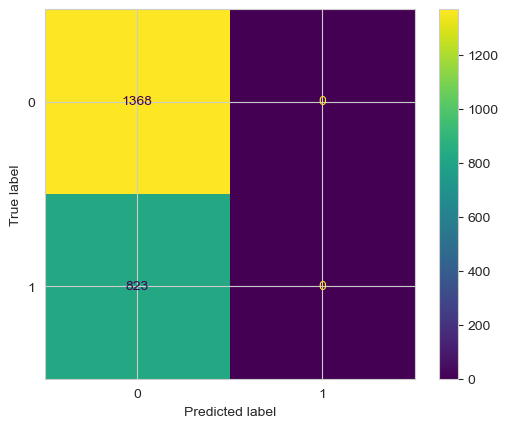

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,grid_predictions)
plt.show()

Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 0 foi média (0.62), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 62%  das vezes.
- **Recall** (proporção de verdadeiros negativos entre todos os resultados verdadeiramente negativos) para a classe 0 foi muito alta (1.0), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 100%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 1 foi muito baixa (0.00), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 0%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 1 foi muito baixa (0.00), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 0%  das vezes.

-------------------------------------------------------------------------------------------

## Random Forest Classifier com GridSearchCV

*_GridSearch with Random Forest Classifier_* adiciona o método de _Random Forest Classifier_ a _GridSearchCV_.

*_Random Forest_* é um método de *_machine learning_* que constrói múltiplas árvores de decisão durante o treinamento do modelo. Normalmente, este método ajustado com *_GridSearch_* demonstra melhores resultados do que um SVC isolado. Verificaremos que no nosso projeto não é esse o caso.

In [45]:
gs_model = RandomForestClassifier(class_weight=manual, random_state=2023)
gs_model.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=2023)

In [46]:
gs_predictions = gs_model.predict(x_test)

In [47]:
print("Classification Report:")
print(classification_report(y_test, gs_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      1368
           1       0.06      0.00      0.00       823

    accuracy                           0.62      2191
   macro avg       0.34      0.49      0.38      2191
weighted avg       0.41      0.62      0.48      2191



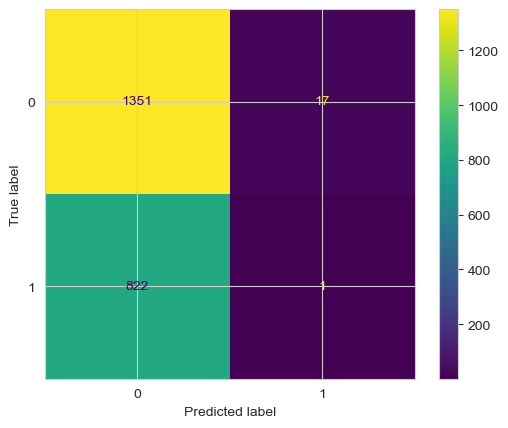

In [48]:
ConfusionMatrixDisplay.from_estimator(gs_model, x_test, y_test, display_labels=y.unique())
plt.show()

Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 0 foi média (0.62), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 62%  das vezes.
- **Recall** (proporção de verdadeiros negativos entre todos os resultados verdadeiramente negativos) para a classe 0 foi muito alta (0.99), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 99%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 1 foi relativamente baixa (0.06), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 0,6%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 1 foi muito baixa (0.0), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 0%  das vezes.

---------------------------------------------------------------------------------------------------------------------------------------------------------

## Logistic Regression Method

*_Logistic Regression_* é um método de *_machine learning_* muito usado para classificações binárias, e por ser popular, simples e rápido de implementar decidimos experimentar também.

In [49]:
x = heartAtk_clean_finalVersion.drop('Heart Attack Risk',axis=1)
y = heartAtk_clean_finalVersion['Heart Attack Risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=101)

c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

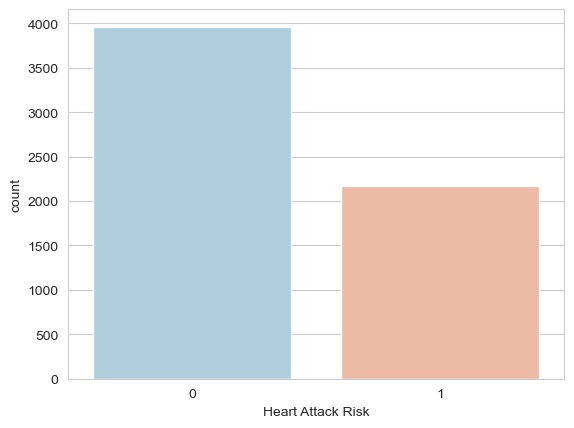

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_train,columns=['Heart Attack Risk']),palette='RdBu_r')

c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

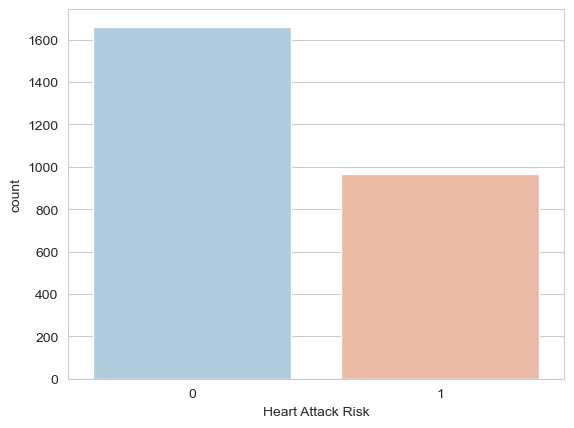

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_test,columns=['Heart Attack Risk']),palette='RdBu_r')

In [52]:
starttime = time.process_time()

logisticModel1 = LogisticRegression(random_state=2022, solver='newton-cg',class_weight=manual)
print(logisticModel1)
logisticModel1.fit(x_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

predictionsLogisticModel1 = logisticModel1.predict(x_test)

LogisticRegression(class_weight={0: 1, 1: 3}, random_state=2022,
                   solver='newton-cg')


c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Time spent: 3.328125 seconds


c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [53]:
starttime = time.process_time()

logisticModel2 = LogisticRegression(random_state=2022, solver='liblinear', class_weight=manual)
print(logisticModel1)
logisticModel2.fit(x_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

predictionsLogisticModel2 = logisticModel2.predict(x_test)

LogisticRegression(class_weight={0: 1, 1: 3}, random_state=2022,
                   solver='newton-cg')
Time spent: 0.125 seconds


In [54]:
print("With solver 'newton-cgs' : \n",classification_report(y_test,predictionsLogisticModel1,zero_division=1))


With solver 'newton-cgs' : 
               precision    recall  f1-score   support

           0       0.80      0.00      0.00      1661
           1       0.37      1.00      0.54       968

    accuracy                           0.37      2629
   macro avg       0.58      0.50      0.27      2629
weighted avg       0.64      0.37      0.20      2629



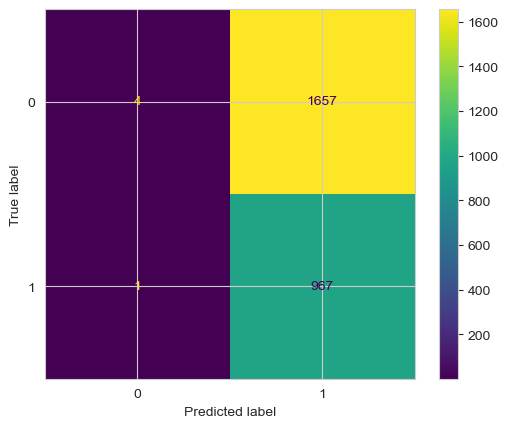

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test,predictionsLogisticModel1)
plt.show()

Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 0 foi alta (0.80), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 80%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 0 foi muito baixa (0.0), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 0%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 1 foi relativamente baixa (0.37), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 37%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 1 foi alta (1.0), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 100%  das vezes.

In [56]:
print("With solver 'liblinear' : \n",classification_report(y_test,predictionsLogisticModel2,zero_division=1))

With solver 'liblinear' : 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00      1661
           1       0.37      1.00      0.54       968

    accuracy                           0.37      2629
   macro avg       0.68      0.50      0.27      2629
weighted avg       0.77      0.37      0.20      2629



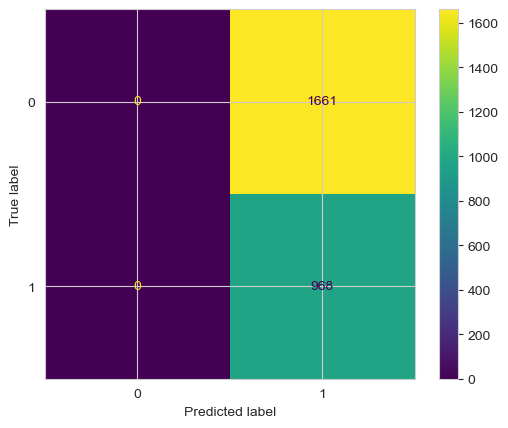

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test,predictionsLogisticModel2)
plt.show()

Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 0 foi alta (1.0), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 100%  das vezes.
- **Recall** (proporção de verdadeiros negativos entre todos os resultados verdadeiramente negativos) para a classe 0 foi muito baixa (0.0), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 0%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 1 foi relativamente baixa (0.37), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 37%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 1 foi alta (1.0), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 100%  das vezes.

----

# Conclusão

O nosso *dataset* tenta prever uma ocorrência médica e como tal, é mais imperativo a previsão correta de casos positivos mesmo que seja à custa de um maior número de casos falsamente positivos. Assim, ponderamos que a previsão da classe 1 é a mais importante e assim tendo só essa consideração, o modelo com mais sucesso será o modelo de *Support Vector Classifier*. Mesmo assim, tentando obter um modelo que não sacrifique totalmente a classificação correta de casos negativos, consideramos que o modelo __*Decision Tree Classifier com CV*__ teve o melhor comportamento de todos, sendo este parecido ao comportamento de *SVC* na classificação de casos positivos, obtendo uma __*precisão correta 84% das vezes*__ com __*precisão de 37%*__ e para os casos negativos esta previsão é correta *__16%__* das vezes mas com uma *__precisão de 64%__*.